In [4]:
import numpy as np
from environments import SARenv, HRLSarENV
from agents_all import QLearningAgent, QLearningAgentAttention, HierarchicalQLearningAgent, HierarchicalQLearningAgentAttention
from utils_functions import plot_learning_curve, policy_evaluation, policy_evaluation_HRL

## Testing Flat architecture

State Space [((0, 0), False, False, False), ((0, 0), False, False, True), ((0, 0), False, True, False), ((0, 0), False, True, True), ((0, 0), True, False, False), ((0, 0), True, False, True), ((0, 0), True, True, False), ((0, 0), True, True, True), ((0, 1), False, False, False), ((0, 1), False, False, True), ((0, 1), False, True, False), ((0, 1), False, True, True), ((0, 1), True, False, False), ((0, 1), True, False, True), ((0, 1), True, True, False), ((0, 1), True, True, True), ((0, 2), False, False, False), ((0, 2), False, False, True), ((0, 2), False, True, False), ((0, 2), False, True, True), ((0, 2), True, False, False), ((0, 2), True, False, True), ((0, 2), True, True, False), ((0, 2), True, True, True), ((0, 3), False, False, False), ((0, 3), False, False, True), ((0, 3), False, True, False), ((0, 3), False, True, True), ((0, 3), True, False, False), ((0, 3), True, False, True), ((0, 3), True, True, False), ((0, 3), True, True, True), ((0, 4), False, False, False), ((0, 4), Fal

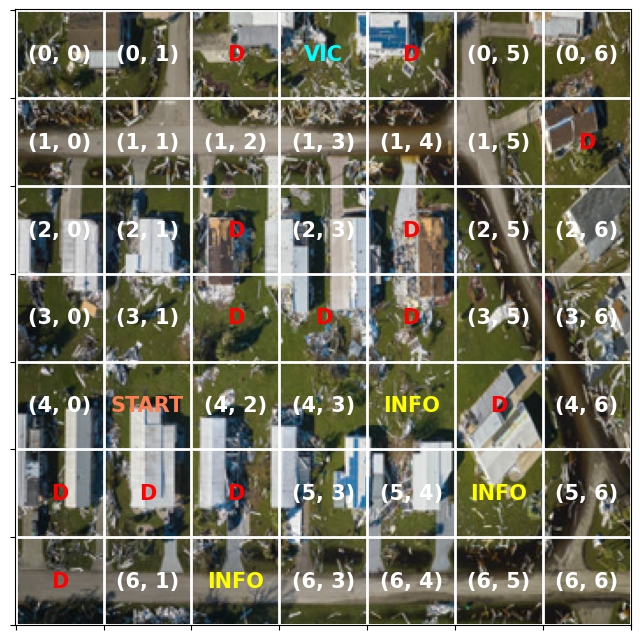

In [3]:
# Example initialization and training
gridsize = [7, 7]
startState = [(4, 1)]
victimStates = [(0, 3)]
ditches = [(1, 6), (2, 2), (2, 4), (3, 2), (3, 3), (3, 4), (4, 5), \
    (5, 0), (5, 1), (5, 2), (6, 0), (0, 2), (0, 4)]
fires = []
POIs = []  # Victim locations
infoLocation = [(4, 4), (6, 2), (5, 5)]  # Location to ask for information was (6, 1)

image_path = "/home/dimi/HRL-LLM/images/disaster_area.jpg"
document_path = "/home/dimi/HRL-LLM/data/sar_data.json"

env = SARenv(gridsize, startState, victimStates, ditches, fires, POIs, infoLocation, image_path, document_path, mode='debug')

In [11]:
np.mean(total_returns0)

-22.54

In [4]:
### flat agent (5 runs -- 1500 episodes) 
all_total_rewards_AGENT_flat = []  # List to store total rewards from each run
for _ in range(2):
    EPISODES = 1500
    ALPHA = 0.1
    GAMMA = 0.998
    EPSILON_MAX = 1.0
    EPSILON_MIN = 0.01
    DECAY_RATE = 2
    agent_flat = QLearningAgent(env, ALPHA, GAMMA, EPSILON_MAX, EPSILON_MIN, DECAY_RATE, EPISODES)
    Q_table0, total_returns0, state_visitations_simple0, exploration_simple0, exploitation_simple0, total_steps0, eps_history0 = agent_flat.train_agent()

    all_total_rewards_AGENT_flat.append(total_returns0)
    
avg_total_rewards_AGENT_flat = np.mean(all_total_rewards_AGENT_flat, axis=0)

  0%|          | 0/1500 [00:00<?, ?it/s]

episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -34 | ε: 0.6666666666666756
episode: 500 | reward: -37 | ε: 0.3333333333333443
episode: 750 | reward: -47 | ε: 0.01
episode: 1000 | reward: -37 | ε: 0.01
episode: 1250 | reward: -64 | ε: 0.01
Exploration count: 7617
Exploitation count: 41999


  0%|          | 0/1500 [00:00<?, ?it/s]

episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -78 | ε: 0.6666666666666756
episode: 500 | reward: -34 | ε: 0.3333333333333443
episode: 750 | reward: -37 | ε: 0.01
episode: 1000 | reward: -44 | ε: 0.01
episode: 1250 | reward: 92 | ε: 0.01
Exploration count: 7566
Exploitation count: 41910


  0%|          | 0/1500 [00:00<?, ?it/s]

episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -48 | ε: 0.6666666666666756
Got the info needed at ep 439 and location (5, 5)
episode: 500 | reward: -32 | ε: 0.14666666666667827
episode: 750 | reward: 92 | ε: 0.01
episode: 1000 | reward: 92 | ε: 0.01
episode: 1250 | reward: 92 | ε: 0.01
Exploration count: 5893
Exploitation count: 33797
POIs identified during training [(0, 3), (4, 1), (3, 0), (2, 0), (1, 2)]
fires identified during training [(5, 6), (6, 5), (3, 6), (2, 5)]


  0%|          | 0/1500 [00:00<?, ?it/s]

episode: 0 | reward: 0 | ε: 1.0
episode: 250 | reward: -108 | ε: 0.6666666666666756
Got the info needed at ep 444 and location (5, 5)
episode: 500 | reward: -47 | ε: 0.01
episode: 750 | reward: 88 | ε: 0.01
episode: 1000 | reward: 92 | ε: 0.01
episode: 1250 | reward: 92 | ε: 0.01
Exploration count: 5973
Exploitation count: 34855
POIs identified during training [(0, 3), (4, 1), (3, 0), (2, 0), (1, 2)]
fires identified during training [(5, 6), (6, 5), (3, 6), (2, 5)]


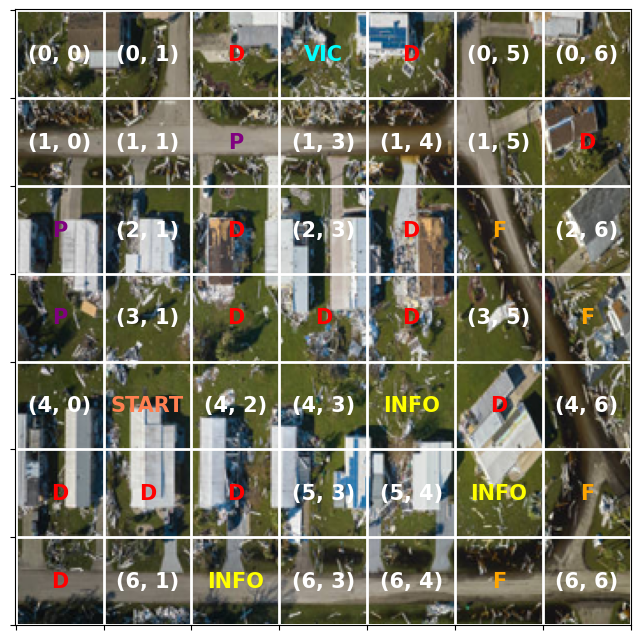

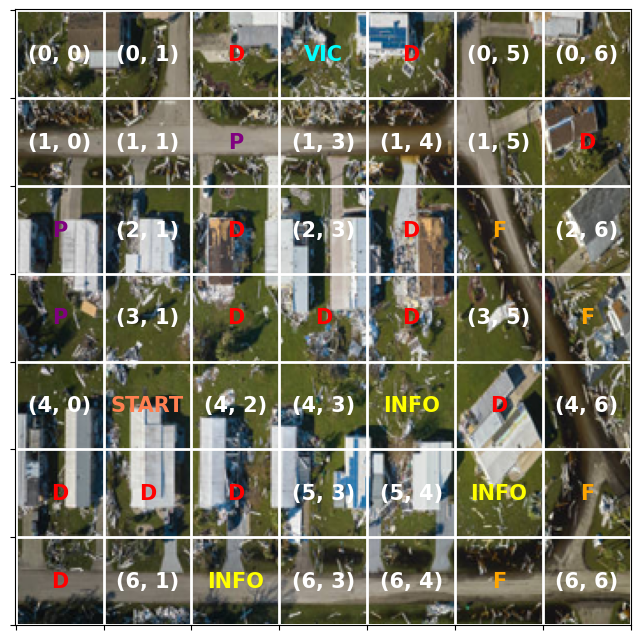

In [10]:
### flat-attention agent (5 runs - 1500 episodes)
all_total_rewards_AGENT_flat_att = []  # List to store total rewards from each run
for _ in range(2):
    EPISODES = 1500
    ALPHA = 0.1
    GAMMA = 0.998
    EPSILON_MAX = 1.0
    EPSILON_MIN = 0.01
    DECAY_RATE = 2
    agent_flat_ATT = QLearningAgentAttention(env, ALPHA, GAMMA, EPSILON_MAX, EPSILON_MIN, DECAY_RATE, EPISODES)
    Q_table, total_returns, state_visitations_simple, exploration_simple, exploitation_simple, total_steps, eps_history, attention = agent_flat_ATT.train_agent()


    all_total_rewards_AGENT_flat_att.append(total_returns)
    
avg_total_rewards_AGENT_flat_att = np.mean(all_total_rewards_AGENT_flat_att, axis=0)

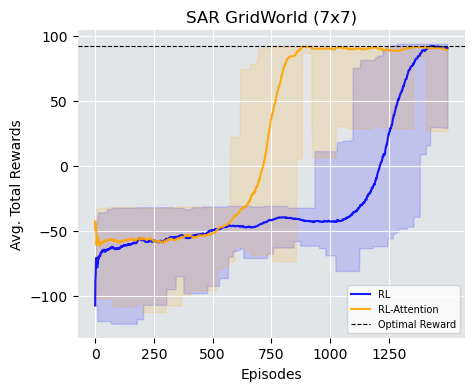

In [11]:
labels = ["RL", "RL-Attention"]
colors = ["blue", "orange"]
total_rewards_list = [avg_total_rewards_AGENT_flat, avg_total_rewards_AGENT_flat_att]
plot_learning_curve(total_rewards_list, EPISODES, labels, colors, optimal_reward=92)

In [12]:
agents = [agent_flat, agent_flat_ATT]
for selected_agent in agents:
    policy_evaluation(env, num_eval_episodes = 1, max_eval_steps_per_episode = 100, agent=selected_agent)

Evaluating policy for agent: Flat
In ((4, 1), False, False, False) --> RIGHT --> get -1 reward | TOTAL REWARD -1
In ((4, 2), False, False, False) --> RIGHT --> get -1 reward | TOTAL REWARD -2
In ((4, 3), False, False, False) --> RIGHT --> get -1 reward | TOTAL REWARD -3
In ((4, 4), False, False, False) --> ASK --> get 5 reward | TOTAL REWARD 2
In ((4, 4), True, False, False) --> DOWN --> get -1 reward | TOTAL REWARD 1
In ((5, 4), True, False, False) --> LEFT --> get -1 reward | TOTAL REWARD 0
In ((5, 3), True, False, False) --> DOWN --> get -1 reward | TOTAL REWARD -1
In ((6, 3), True, False, False) --> LEFT --> get -1 reward | TOTAL REWARD -2
In ((6, 2), True, False, False) --> ASK_Y --> get 5 reward | TOTAL REWARD 3
In ((6, 2), True, True, False) --> RIGHT --> get -1 reward | TOTAL REWARD 2
In ((6, 3), True, True, False) --> RIGHT --> get -1 reward | TOTAL REWARD 1
In ((6, 4), True, True, False) --> RIGHT --> get -1 reward | TOTAL REWARD 0
In ((6, 5), True, True, False) --> UP --> ge

## Testing HRL architecture in sparse reward environment 

### Here, evaluation of the HRL methods. To test the flat agents in sparse reward environemnt just go to the corresponding environment class (SARenv) and remove the rewards when the agent collects the proper information. By removing them, neither the flat agent nor the flat-attention agent will be able to solve the problem.

In [5]:
env = HRLSarENV()

In [6]:
all_total_rewards_AGENT_hier = []  # List to store total rewards from each run
EPISODES = 1500
for _ in range(1):
    # Manager for choosing options
    manager_hier = HierarchicalQLearningAgent(env, 785, 3)  # State space size 7*7*2*2*2*2, 3 options
    explore_worker_hier = HierarchicalQLearningAgent(env, 785, 4)  # [Up, down, left, right]
    collect_worker_hier = HierarchicalQLearningAgent(env, 785, 6)  # [A, B, C, X, Y, Z]
    operate_worker_hier = HierarchicalQLearningAgent(env, 785, 4)  # [save, use, remove, carry]

    workers_hier = {
        0: explore_worker_hier,  # Worker for EXPLORE
        1: collect_worker_hier,  # Worker for COLLECT
        2: operate_worker_hier   # Worker for OPERATE
    }
    hier_returns, workers_simple = manager_hier.train(manager_hier, workers_hier, EPISODES)
    all_total_rewards_AGENT_hier.append(hier_returns)
    
avg_total_rewards_AGENT_hier = np.mean(all_total_rewards_AGENT_hier, axis=0)

Episode: 0, Total Reward: 0, Exploration Rate: 1.0
Episode: 250, Total Reward: -39, Exploration Rate: 0.6666666666666756
Episode: 500, Total Reward: -41, Exploration Rate: 0.3333333333333443
Episode: 750, Total Reward: -71, Exploration Rate: 0.01
Episode: 1000, Total Reward: 91, Exploration Rate: 0.01
Episode: 1250, Total Reward: 94, Exploration Rate: 0.01


In [7]:
all_total_rewards_AGENT_hier_att = []  # List to store total rewards from each run
EPISODES = 1500
for _ in range(1):
    env = HRLSarENV()
    manager_hier_att = HierarchicalQLearningAgentAttention(env, 785, 3)  # State space size 7*7*2*2*2*2, 3 options
    explore_worker_hier_att = HierarchicalQLearningAgentAttention(env, 785, 4)  # [Up, down, left, right]
    collect_worker_hier_att = HierarchicalQLearningAgentAttention(env, 785, 6)  # [A, B, C, X, Y, Z]
    operate_worker_hier_att = HierarchicalQLearningAgentAttention(env, 785, 4)  # [save, use, remove, carry] 

    workers_hier_att = {
        0: explore_worker_hier_att,  # Worker for EXPLORE
        1: collect_worker_hier_att,  # Worker for COLLECT
        2: operate_worker_hier_att   # Worker for OPERATE
    }
    hier_att_returns, attention, workers = manager_hier_att.train(manager_hier_att, workers_hier_att, EPISODES)
    all_total_rewards_AGENT_hier_att.append(hier_att_returns)
    
avg_total_rewards_AGENT_hier_att = np.mean(all_total_rewards_AGENT_hier_att, axis=0)

Episode: 0, Total Reward: 0, Exploration Rate: 1.0
Episode: 250, Total Reward: -51, Exploration Rate: 0.6666666666666756
Got the info needed at ep 456 and location (5, 5)
Episode: 500, Total Reward: -47, Exploration Rate: 0.3053333333333444
Episode: 750, Total Reward: 73, Exploration Rate: 0.01
Episode: 1000, Total Reward: 92, Exploration Rate: 0.01
Episode: 1250, Total Reward: 92, Exploration Rate: 0.01


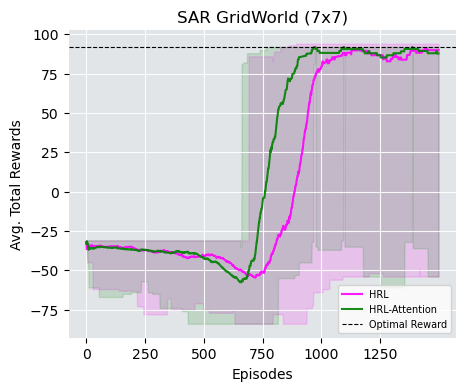

In [8]:
labels = ["HRL", "HRL-Attention"]
colors = ["magenta", "green"]
total_rewards_list = [avg_total_rewards_AGENT_hier, avg_total_rewards_AGENT_hier_att]
plot_learning_curve(total_rewards_list, EPISODES, labels, colors, optimal_reward=92)

In [6]:
hierarchical_agents = [manager_hier, manager_hier_att]
workers_sets = [workers_hier, workers_hier_att]  # Corresponding sets of workers for each manager
for idx, selected_hierarchical_agent in enumerate(hierarchical_agents):
    selected_workers = workers_sets[idx]  # Select the corresponding workers for the current manager
    policy_evaluation_HRL(env, selected_workers, num_eval_episodes=1, agent=selected_hierarchical_agent)


Evaluating policy for agent: HRL
In [4, 1, 0, 0, 0, 0], Option 0, Action 3, Reward -1, Next State [4, 2, 0, 0, 0, 0]
In [4, 2, 0, 0, 0, 0], Option 0, Action 3, Reward -1, Next State [4, 3, 0, 0, 0, 0]
In [4, 3, 0, 0, 0, 0], Option 0, Action 3, Reward -1, Next State [4, 4, 0, 0, 0, 0]
In [4, 4, 0, 0, 0, 0], Option 1, Action 0, Reward -1, Next State [4, 4, 1, 0, 0, 0]
In [4, 4, 1, 0, 0, 0], Option 0, Action 2, Reward -1, Next State [4, 3, 1, 0, 0, 0]
In [4, 3, 1, 0, 0, 0], Option 0, Action 1, Reward -1, Next State [5, 3, 1, 0, 0, 0]
In [5, 3, 1, 0, 0, 0], Option 0, Action 1, Reward -1, Next State [6, 3, 1, 0, 0, 0]
In [6, 3, 1, 0, 0, 0], Option 0, Action 2, Reward -1, Next State [6, 2, 1, 0, 0, 0]
In [6, 2, 1, 0, 0, 0], Option 1, Action 1, Reward -1, Next State [6, 2, 1, 1, 0, 0]
In [6, 2, 1, 1, 0, 0], Option 0, Action 3, Reward -1, Next State [6, 3, 1, 1, 0, 0]
In [6, 3, 1, 1, 0, 0], Option 0, Action 3, Reward -1, Next State [6, 4, 1, 1, 0, 0]
In [6, 4, 1, 1, 0, 0], Option 0, Action 0, 